# Masking regions

## Germany

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import cordex as cx
import xarray as xr
from cartopy import crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)
proj = ccrs.LambertConformal(central_longitude=15)

/opt/anaconda3/envs/pyremo/lib/python3.8/site-packages/regionmask/core/_geopandas.py:57: FutureWarning: The default value of regex will change from True to False in a future version.
  names = names.str.replace(r"[(\[\]).]", "")
/opt/anaconda3/envs/pyremo/lib/python3.8/site-packages/regionmask/core/_geopandas.py:58: FutureWarning: The default value of regex will change from True to False in a future version.
  names = names.str.replace("[/-]", " ")


<GeoAxesSubplot:>

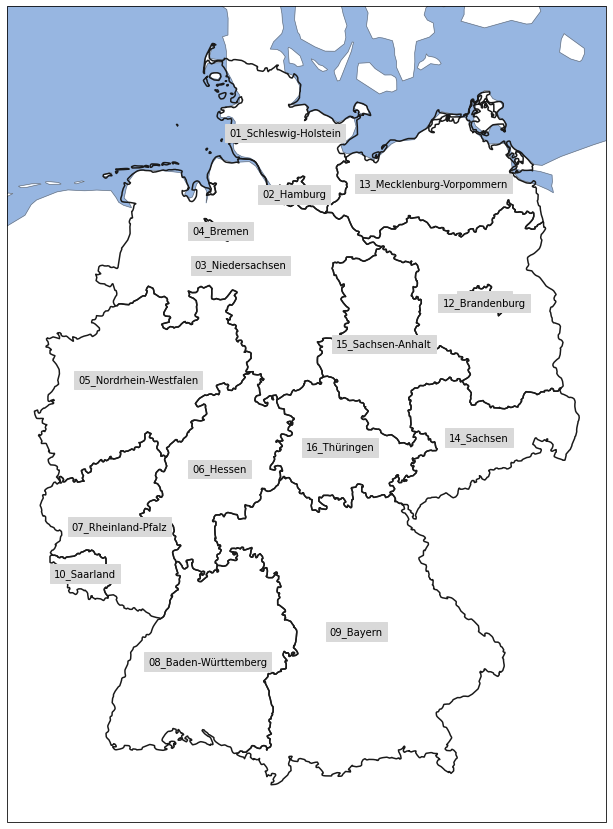

In [15]:
cx.regions.germany.regionmask('lan').plot(add_ocean=True, proj=proj, resolution="50m", label="name")

<AxesSubplot:>

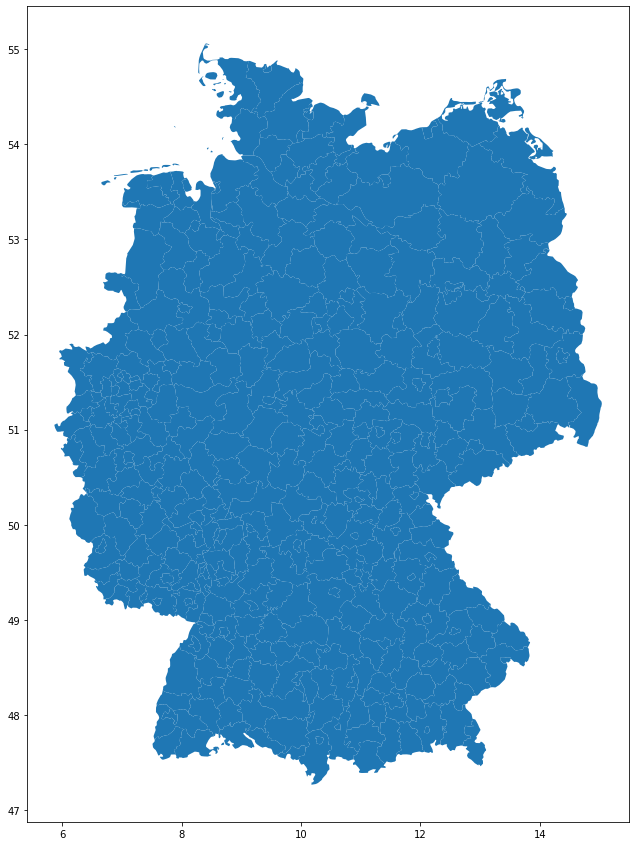

In [24]:
#cx.regions.germany.regionmask('krs').plot(add_ocean=True, proj=proj, resolution="50m")
cx.regions.germany.geodataframe('krs').plot()#add_ocean=True, proj=proj, resolution="50m")

## Prudence

<GeoAxesSubplot:>

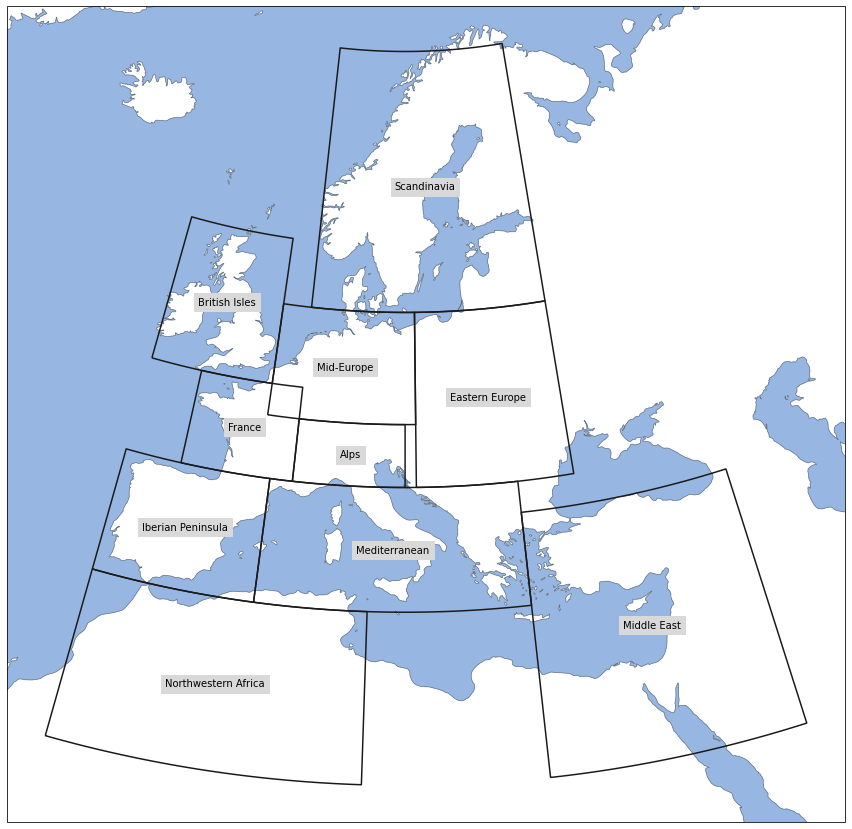

In [29]:
prudence = cx.regions.prudence.regionmask()
prudence.plot(add_ocean=True, proj=proj, resolution="50m", label="name")

In [67]:
eur11 = cx.cordex_domain("EUR-11", dummy="topo")
pole = eur11.rotated_latitude_longitude.grid_north_pole_longitude, eur11.rotated_latitude_longitude.grid_north_pole_latitude

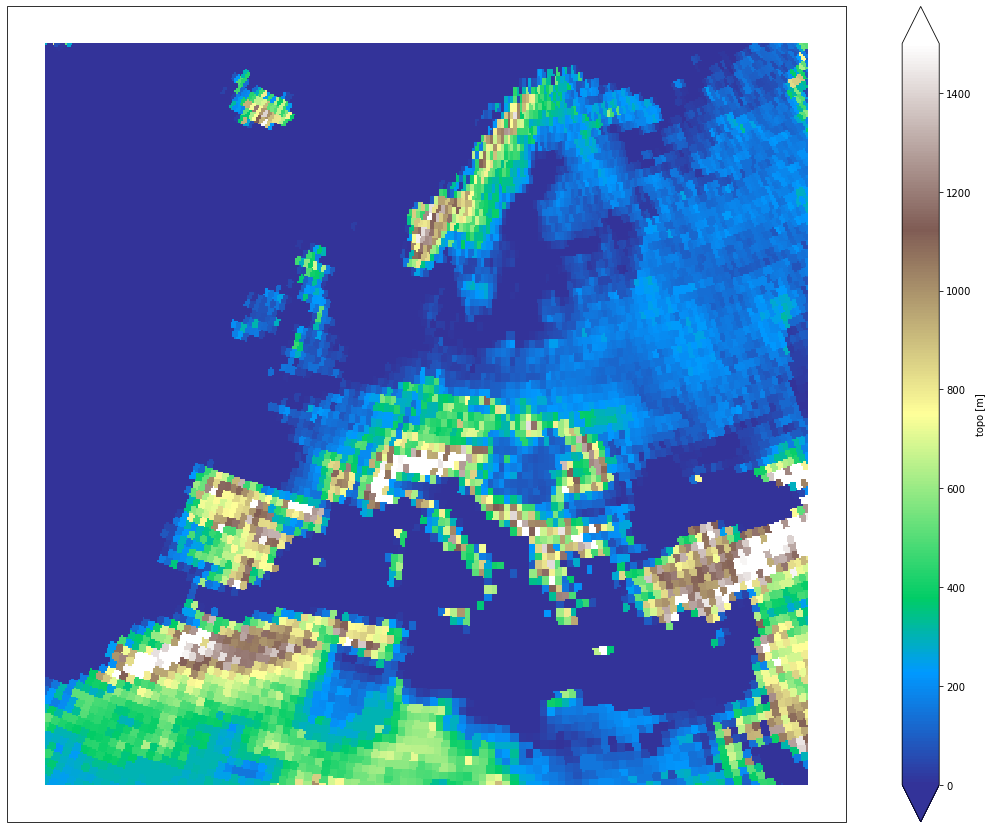

In [28]:
ax = eur11.topo.plot(subplot_kws={'projection': proj}, cmap="terrain", vmin=0, vmax=1500)

### Working with prudence regions

In [68]:
transform = ccrs.RotatedPole(*pole)
#mask_fr.where(mask_fr, drop=True).plot(ax=ax, transform=ccrs.PlateCarree())

more examples here: https://regionmask.readthedocs.io/en/latest/notebooks/mask_3D.html#working-with-a-3d-mask

In [69]:
# mask_3D with overlapping regions, see also: https://github.com/regionmask/regionmask/issues/228
lon, lat = eur11.lon, eur11.lat
masks = [prudence[[i]].mask_3D(lon, lat) for i in prudence.numbers]
mask_3D = xr.concat(masks, dim="region")

In [70]:
# 1) by the index of the region:
sc = mask_3D.sel(region=(mask_3D.abbrevs == "SC"))

# 2) with the abbreviation
me = mask_3D.isel(region=(mask_3D.abbrevs == "ME"))

In [71]:
topo_me = eur11.topo.where(me.squeeze(), drop=True)
topo_sc = eur11.topo.where(sc.squeeze(), drop=True)

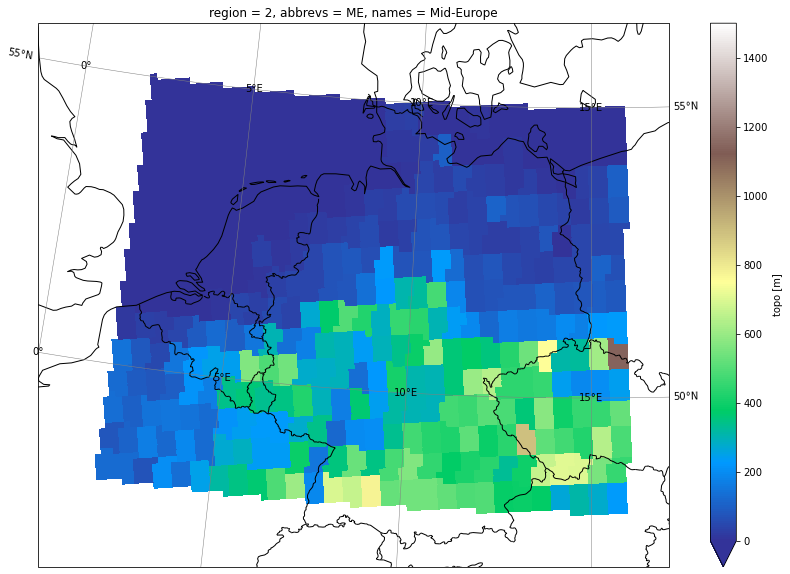

In [81]:
plt.figure(figsize=(15, 10))
ax = plt.axes(projection=proj)
ax.coastlines(resolution='50m', color='black', linewidth=1)
ax.add_feature(cf.BORDERS)
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray',
                      xlocs=range(-180,180,5), ylocs=range(-90,90,5))
topo_me.plot(ax=ax, cmap="terrain", vmin=0, vmax=1500, transform=transform)

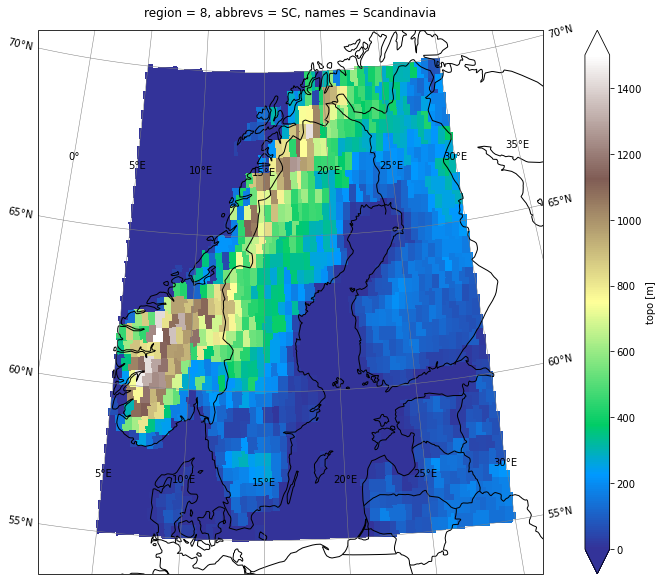

In [82]:
plt.figure(figsize=(15, 10))
ax = plt.axes(projection=proj)
ax.coastlines(resolution='50m', color='black', linewidth=1)
ax.add_feature(cf.BORDERS)
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray',
                      xlocs=range(-180,180,5), ylocs=range(-90,90,5))
topo_sc.plot(ax=ax, cmap="terrain", vmin=0, vmax=1500, transform=transform)